# Machine Exercise 1
### Submitted by: CAYAS, Ryan Roi [2022-22085]


## Prerequisites

We first import the required packages and load the necessary files.

In [ ]:
# Install openpyxl if not yet installed
!pip install openpyxl

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score


## Problem 1: Energy Efficiency in Buildings

In [20]:
np.set_printoptions(precision=6)

In [6]:
energy_df = pd.read_excel(r"ENB2012_data.xlsx")
energy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### EDA

In [11]:
# We first check for missing values
energy_df.isna().sum().sum() # no missing values

0

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


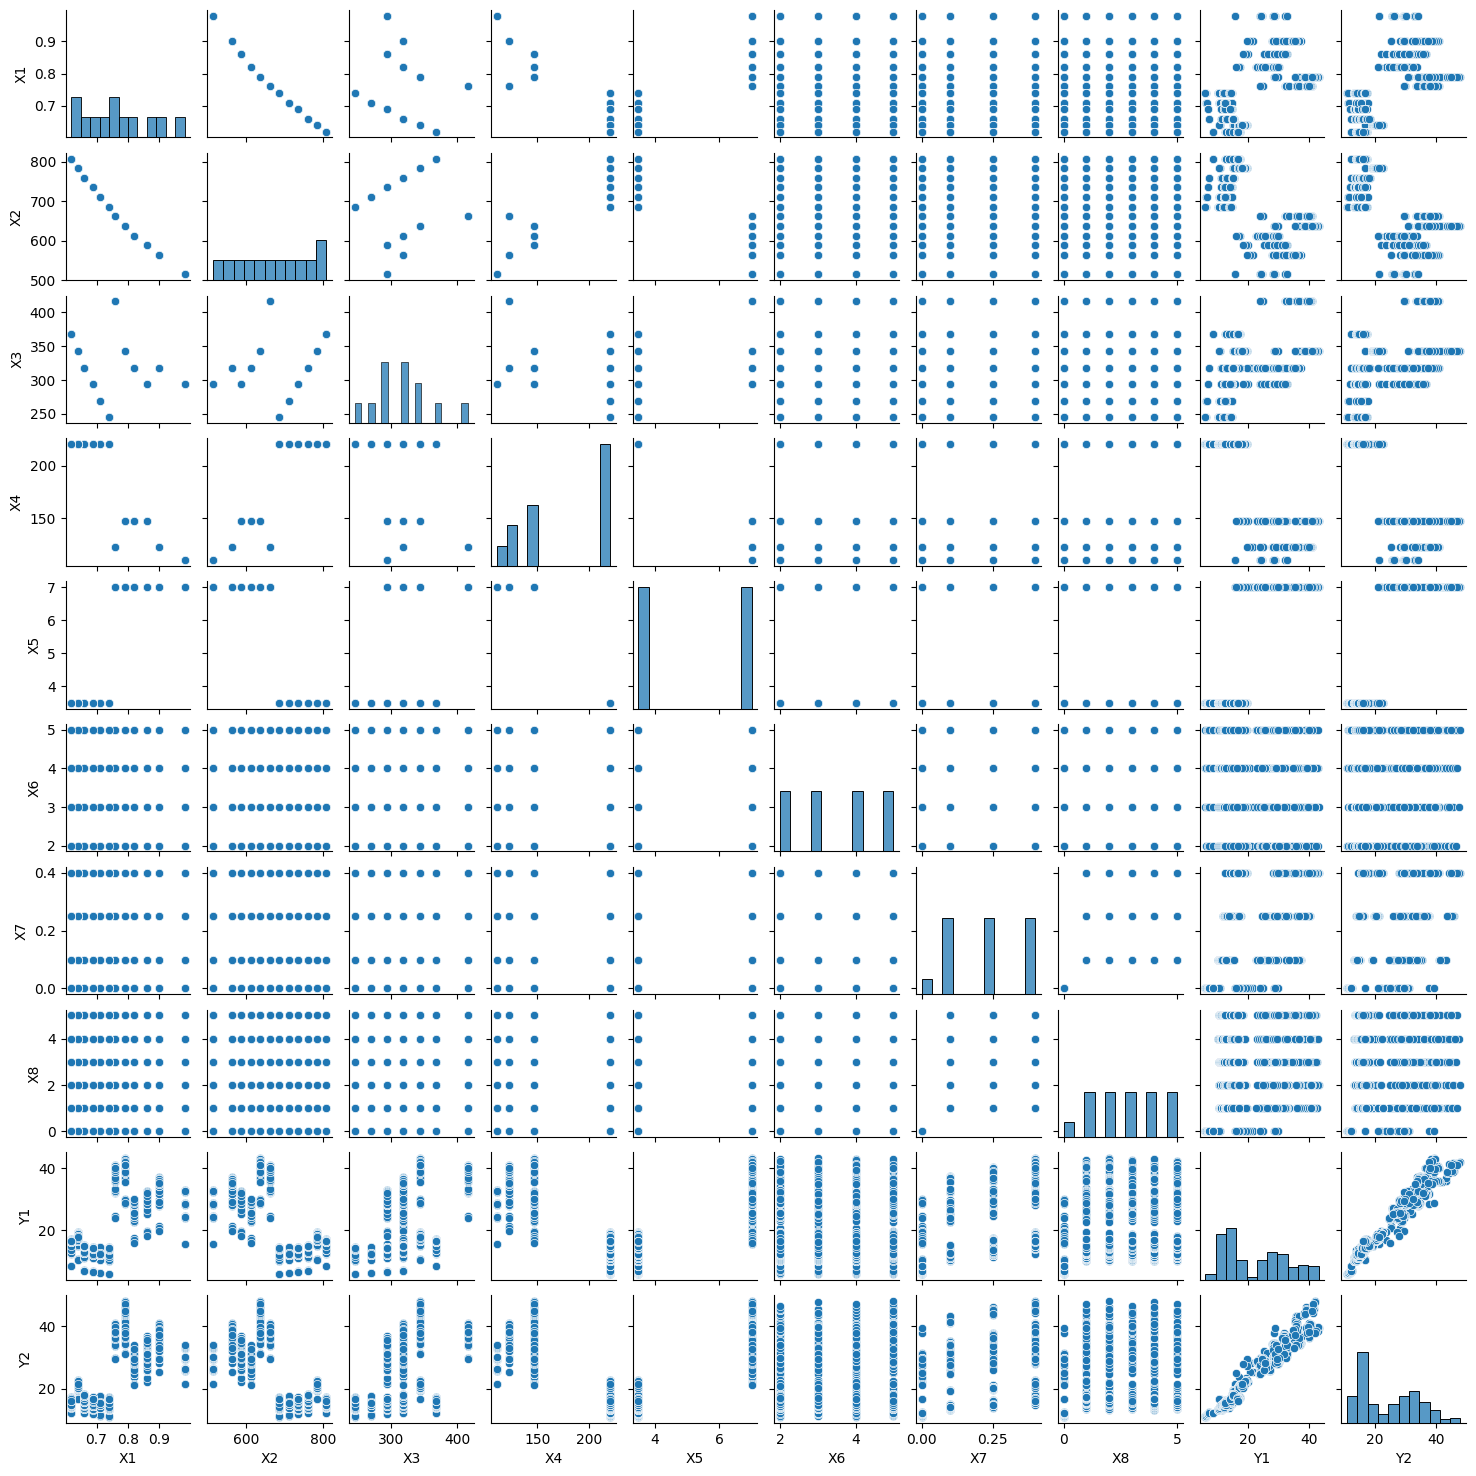

In [10]:
print(energy_df)
sns.pairplot(energy_df, height=1.5)
plt.show()

We can see that the two output features are almost perfectly correlated with each other. Hence, it will most likely suffice to predict the <b>heating load</b> only.

### Pre-processing

In [46]:
# Extract the regressors and the target from the data frame
x, y = energy_df.iloc[:,:8].to_numpy(), energy_df.iloc[:,-2].to_numpy()

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(460, 8)
(154, 8)
(154, 8)


### Modeling

In [47]:
# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.01, 0.001, 0.0001, 1, 2, 5, 10, 20]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [ -7.40029  -19.857881   8.486366  11.879687   7.293223  -0.136866
   2.672106   0.316527]
	Intercept: 22.32329565217392
	Training accuracy (R2): 0.917409461172736
	Validation accuracy (R2): 0.9047019465454809
Alpha: 0.1
	Coefficients: [-7.179456 -3.901198  0.665371 -4.140798  7.358452 -0.137136  2.670908
  0.318031]
	Intercept: 22.32329565217392
	Training accuracy (R2): 0.9174048952475705
	Validation accuracy (R2): 0.904700064693237
Alpha: 0.01
	Coefficients: [-7.377322 -4.037638  0.633563 -4.258828  7.300126 -0.136893  2.671984
  0.316683]
	Intercept: 22.32329565217392
	Training accuracy (R2): 0.917409411951333
	Validation accuracy (R2): 0.9047022358947001
Alpha: 0.001
	Coefficients: [-7.397984 -4.051937  0.630266 -4.271216  7.293917 -0.136868  2.672094
  0.316543]
	Intercept: 22.32329565217392
	Training accuracy (R2): 0.9174094606767069
	Validation accuracy (R2): 0.9047019806515562
Alpha: 0.0001
	Coefficients: [-7.400059 -4.053374  0.629936 -4.27246   7.293

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.67904e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Model Validation

Best alpha: 0.01
Training accuracy (R2):0.917409411951333
Validation accuracy (R2):0.9047022358947001
Coefficients: [-7.377322 -4.037638  0.633563 -4.258828  7.300126 -0.136893  2.671984
  0.316683]
Intercept: 22.32329565217392
Testing accuracy (R2) of Best Model: 0.9227552373536396


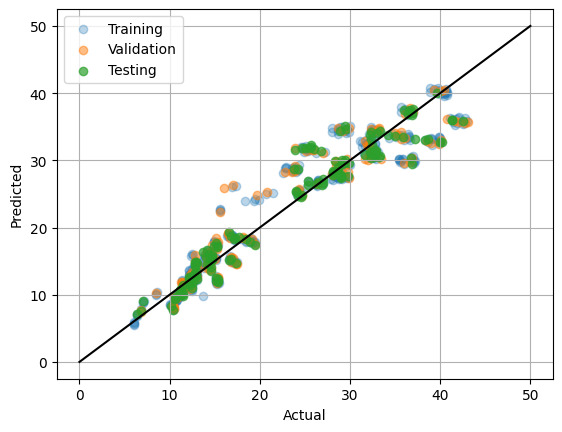

In [48]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f'Training accuracy (R2):{best_mdl.score(X_train,y_train)}')
print(f'Validation accuracy (R2):{best_mdl.score(X_val,y_val)}')
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

#### Additional: Residual Analysis

We perform residual analysis to verify the validity of our regression model.

In [ ]:
# Residuals vs Fitted Values
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
# QQ Plot
sm.qqplot(model.resid, line='s')
plt.show()

### Item B

In [49]:
coefs = best_mdl[1].coef_
ranked_idxs = np.argsort(abs(coefs))[::-1]

for idx in ranked_idxs:
    print(f'Feature X{idx+1}: {coefs[idx]}')


Feature X1: -7.377322042940027
Feature X5: 7.300126493894648
Feature X4: -4.258828138827426
Feature X2: -4.037638367663473
Feature X7: 2.6719843122512765
Feature X3: 0.6335631480976552
Feature X8: 0.3166828998158393
Feature X6: -0.1368928276490543


The top five features are X1, X5, X4, X2, and X7.

In [50]:
# Extract the regressors and the target from the data frame
x_b, y_b = energy_df.iloc[:,ranked_idxs[:5]].to_numpy(), energy_df.iloc[:,-2].to_numpy()

# Hold out the validation and test data
X_train_b, X_2_b, y_train_b, y_2_b = train_test_split(x_b, y_b, test_size=0.4, random_state=1)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_2_b, y_2_b, test_size=0.5, random_state=1)
print(X_train_b.shape)
print(X_val_b.shape)
print(X_test_b.shape)


(460, 5)
(154, 5)
(154, 5)


Best alpha: 0.0
Training accuracy (R2):0.9221571404793001
Validation accuracy (R2):0.9086875577504812
Coefficients: [-6.474337  7.738054 -4.976791 -2.074789  2.668023]
Intercept: 21.990469565217424
Testing accuracy (R2) of Best Model: 0.898502279431415


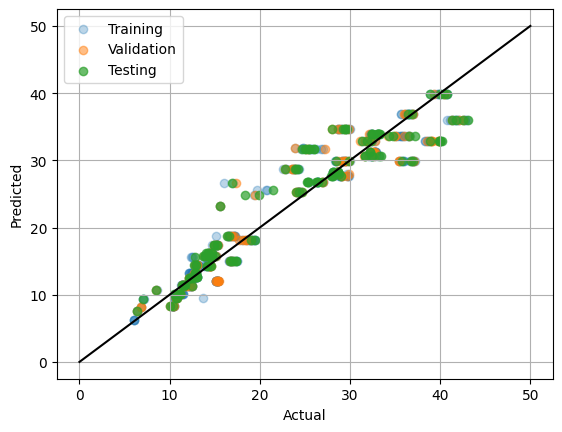

In [52]:
# Search over different regularization parameter values
max_R2_b = 0
best_alpha_b = 0
best_mdl_b = 0
for alpha_b in np.array([0, 0.1, 0.01, 0.001, 0.0001, 1, 2, 5, 10, 20]):
    mdl_b = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha_b)).fit(X_train_b,y_train_b)
    train_R2_b = mdl_b.score(X_train_b,y_train_b)
    val_R2_b = mdl_b.score(X_val_b,y_val_b)
    if val_R2_b > max_R2_b:
        max_R2_b = val_R2_b
        best_alpha_b = alpha_b
        best_mdl_b = mdl_b

# Print results of the best model
print(f"Best alpha: {best_alpha_b}")
print(f'Training accuracy (R2):{best_mdl_b.score(X_train_b,y_train_b)}')
print(f'Validation accuracy (R2):{best_mdl_b.score(X_val_b,y_val_b)}')
print(f"Coefficients: {best_mdl_b[1].coef_}")
print(f"Intercept: {best_mdl_b[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2_b = best_mdl_b.score(X_test_b,y_test_b)
print(f"Testing accuracy (R2) of Best Model: {test_R2_b}")
y_train_pred_b = best_mdl_b.predict(X_train_b)
y_val_pred_b = best_mdl_b.predict(X_val_b)
y_test_pred_b = best_mdl_b.predict(X_test_b)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train_b, y_train_pred_b, alpha=0.3, label="Training")
plt.scatter(y_val_b, y_val_pred_b, alpha=0.5, label="Validation")
plt.scatter(y_test_b, y_test_pred_b, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

### Insights

Based on my results for this problem, I gained the following insights:
* Considering only the top significant features will not significantly reduce the performance of the model, and is sometimes already sufficient. This insight will be particularly helpful when it will take a significantly longer time to train the model using the entire feature space.
* The relative compactness and overall height most significantly influences a building's heating load. The former significantly decreases it while the latter increases it by the highest magnitude. This means that a building will be energy efficient if it is relatively compact and its height is low, which is self-evident.

## Problem 2: Classifying Breast Tumors

In [74]:
tumor_df =  pd.read_csv('wdbc.data', sep=",", header=None)
tumor_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
# We first check for missing values
tumor_df.isna().sum().sum() # no missing values

0

### Pre-processing

In [75]:
# Extract the features and the target from the data frame
x, y = tumor_df.iloc[:,2:].to_numpy(), tumor_df.iloc[:,1].to_numpy()

# # We change y to numeric. 'M' = 1 and 'B' = 0
# y[y == 'M'] = 1
# y[y == 'B'] = 0

In [76]:
# Hold out the test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=6)
print(x.shape)
print(X_train.shape)
print(X_test.shape)


(569, 30)
(398, 30)
(171, 30)


### Modeling

In [109]:
model = make_pipeline(StandardScaler(),
                    LogisticRegression(solver='newton-cg', random_state=8)).fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"training accuracy = {model.score(X_train, y_train)}")
print(f"testing accuracy = {model.score(X_test, y_test)}")
print(f"Coefficients: ", model[1].intercept_, model[1].coef_)

training accuracy = 0.9899497487437185
testing accuracy = 0.9649122807017544
Coefficients:  [-0.593139] [[ 0.515198  0.713597  0.543668  0.547524 -0.025891 -0.255659  0.875747
   0.581354  0.236837 -0.663199  0.654806 -0.555631  0.45151   0.700784
   0.415889 -0.483321  0.099407 -0.03291  -0.389083 -0.47301   1.086769
   1.285253  1.009297  1.015546  1.141689 -0.015035  0.827766  0.922926
   0.663887  0.37265 ]]


In [110]:
coefs = model[1].coef_[0]
ranked_idxs = np.argsort(abs(coefs))[::-1]

for idx in ranked_idxs[:10]:
    print(f'Feature {idx+1}: \t {coefs[idx]}')


Feature 22: 	 1.2852529401009096
Feature 25: 	 1.1416892745650575
Feature 21: 	 1.0867692549532577
Feature 24: 	 1.015546124186956
Feature 23: 	 1.0092968600167733
Feature 28: 	 0.9229256072316674
Feature 7: 	 0.8757471412460658
Feature 27: 	 0.8277658748337955
Feature 2: 	 0.7135973433213579
Feature 14: 	 0.7007837698273791


### Model Validation (Training Set)

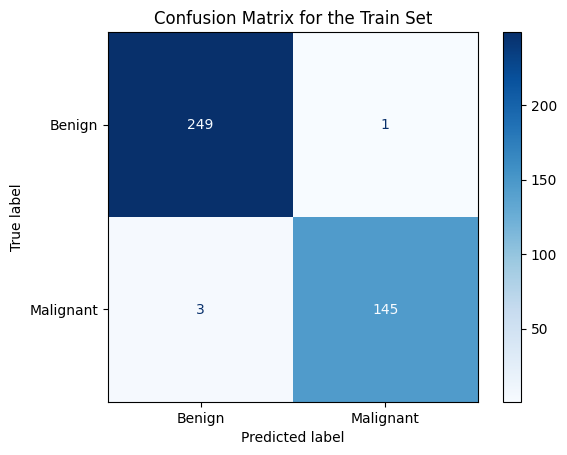

In [105]:
cm_display = ConfusionMatrixDisplay.from_estimator(
        model,
        X_train,
        y_train,
        display_labels= ["Benign", "Malignant"],
        cmap=plt.cm.Blues,
        normalize=None,
    )
plt.title('Confusion Matrix for the Train Set')
plt.show()

In [112]:
print(classification_report(y_train, y_train_pred, target_names=  ["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       250
   Malignant       0.99      0.98      0.99       148

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [130]:
cfm_train = confusion_matrix(y_train, y_train_pred)

FP = cfm_train[0][1]
TN = cfm_train[1][1]

# False alarm rate
FPR_train = FP/(FP+TN)
print(f'False Alarm Rate: {FPR_train}')

False Alarm Rate: 0.00684931506849315


AUC:  0.999027027027027


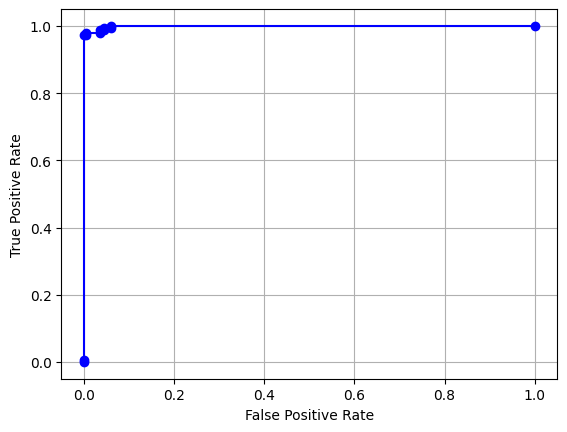

In [142]:
# we change the class labels to numeric
y_train[y_train == 'M'] = 1
y_train[y_train == 'B'] = 0
y_train = y_train.astype(int)

y2 = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y2[:,1])
print(f"AUC: ", roc_auc_score(y_train, y2[:,1]))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

### Model Validation (Test Set)

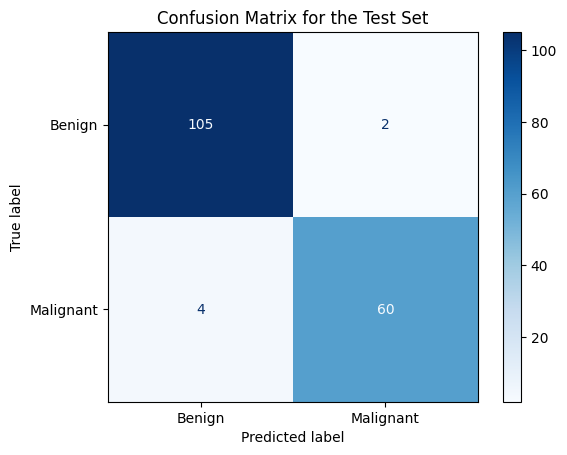

In [143]:
cm_display = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels= ["Benign", "Malignant"],
        cmap=plt.cm.Blues,
        normalize=None,
    )
plt.title('Confusion Matrix for the Test Set')
plt.show()

In [144]:
print(classification_report(y_test, y_test_pred, target_names=  ["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       107
   Malignant       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [145]:
cfm_train = confusion_matrix(y_test, y_test_pred)

FP = cfm_train[0][1]
TN = cfm_train[1][1]

# False alarm rate
FPR_test = FP/(FP+TN)
print(f'False Alarm Rate: {FPR_test}')

False Alarm Rate: 0.03225806451612903


AUC:  0.9883177570093458


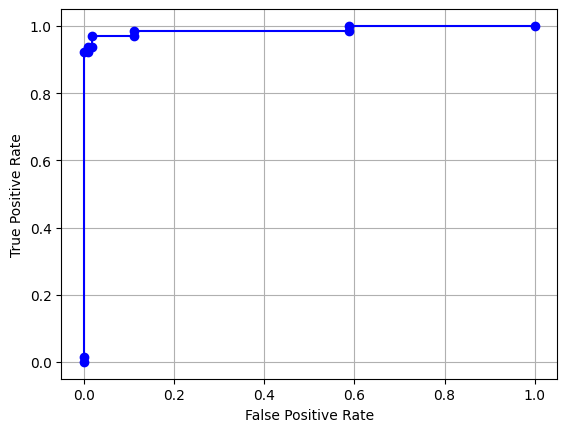

In [146]:
# we change the class labels to numeric
y_test[y_test == 'M'] = 1
y_test[y_test == 'B'] = 0
y_test = y_test.astype(int)

y2 = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y2[:,1])
print(f"AUC: ", roc_auc_score(y_test, y2[:,1]))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

### Insights

Based on my results from this problem, I gained the following insights:
* We need to look at various metrics to get a full gist of our model's predictive capabilities. For instance, the false alarm rate for the test set tells us that our model has a small tendency to falsely predict a tumor as malignant. Aside from the metrics used, another metric that we can look into is the false negative rate since it can also provide us useful info on how often our model is unable to correctly classify a malignant tumor.
* The five most significant determinants of a malignant tumor are radius(3), texture(3), perimeter(3), area(3), smoothness(3). It seems that features from the third cell nucleus have the most impact in the model.